In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use("fivethirtyeight")

**Loading the Dataset**

In [193]:
df = pd.read_csv("Rainfall.csv")

In [194]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [195]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [196]:
df.shape

(366, 12)

In [197]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [200]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

**Whitespace Cleaning**

In [201]:
df.columns = df.columns.str.strip()

In [202]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [203]:
df = df.drop(columns=['day'])

In [204]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


**Handling Missing Values**

In [205]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [206]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [207]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [208]:
df['winddirection'].mode()[0]

20.0

In [209]:
df['windspeed'].median()

20.5

In [210]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [211]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

**Converting Categorical Column into Numerical Column**

In [212]:
df['rainfall'] = df['rainfall'].map({"yes": 1, "no": 0})

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


*EDA* 

In [214]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

**Histograms**

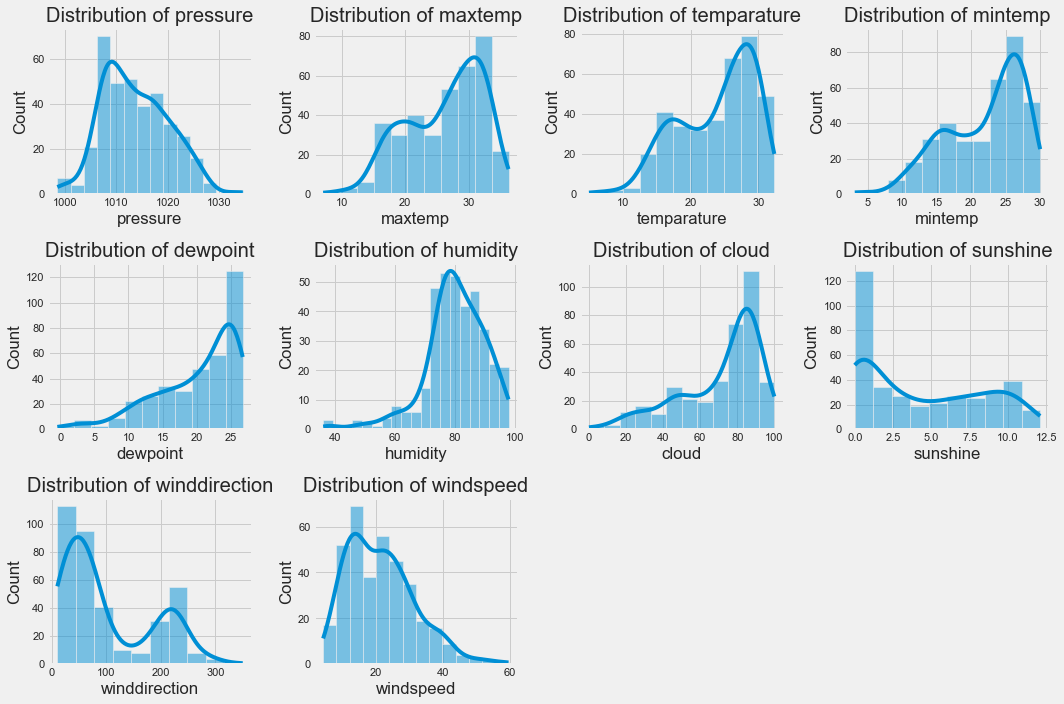

In [215]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

Based on these distributions:

- Most weather variables have slight skewness.
- Sunshine is heavily right-skewed (many low sunshine days).
- Humidity and cloud values are mostly high.
- No extreme multimodal patterns
- Data looks stable.


**Class Distribution-Count Plot**

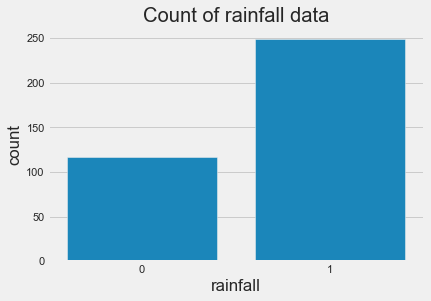

In [216]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "rainfall", data = df)
plt.title("Count of rainfall data")
plt.show()

* This indicates class imbalance, which needs handling before model training.

**Correlation Matrix (Heatmap)**

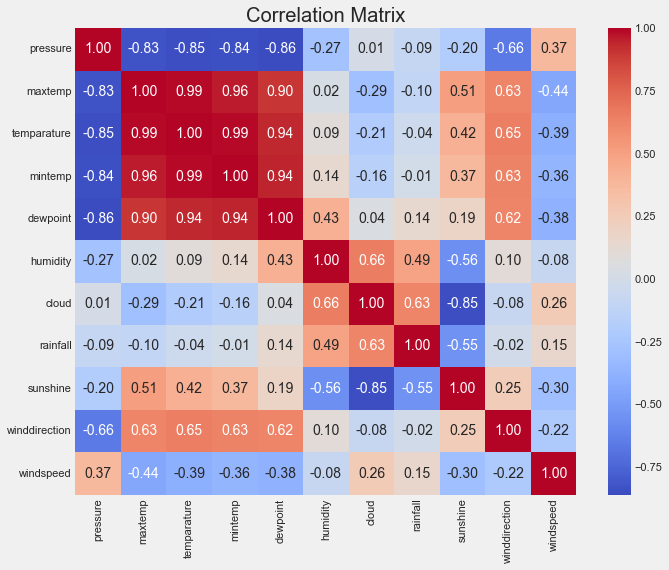

In [217]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

* Based on correlation, maxtemp, temparature, mintemp, and dewpoint are highly correlated temperature-related columns.

In [218]:
df = df.drop(columns = ['maxtemp', 'temparature', 'mintemp'])

* These columns were dropped because they were highly correlated.

* Remaining important features still represent temperature through dewpoint.

In [219]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


**Outliers Detection - Boxplots**

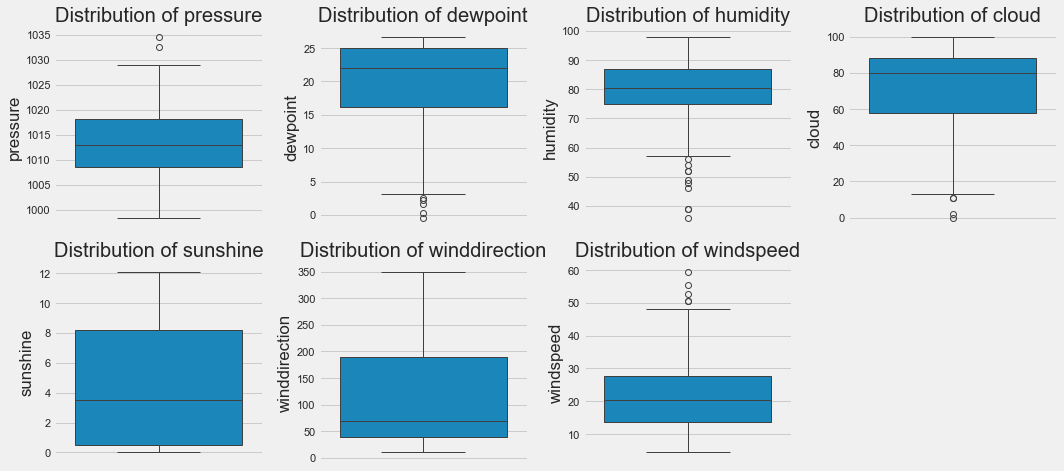

In [220]:
columns = ['pressure', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

* Most of variables show only moderate or low outlier presence.

* These outliers align with natural weather variability, not data entry errors.

* The outliers are not strong enough to cause problems for the model, so we don't need to remove or change them.

**Random Undersampling**

In [221]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [222]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [223]:
downsample_indices = np.random.choice(df_majority.index, size = len(df_minority), replace=False)

In [224]:
df_majority_downsampled = df_majority.loc[downsample_indices]

In [225]:
df_majority_downsampled.shape

(117, 8)

In [226]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [227]:
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop=True)

In [228]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64